# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


from matplotlib import *
import sys
from pylab import *
import warnings
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('C:\Projects\Forest-Fires\Algeria\data\Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df_Algeria = df.copy()
index = df[df['day']=='Sidi-Bel Abbes Region Dataset'].index.values
index

array([122], dtype=int64)

In [4]:
df_Algeria.loc[:122,'Region'] = 1
df_Algeria.loc[122:,'Region'] = 2    
df_Algeria.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [5]:
df_Algeria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [6]:
df_Algeria.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [7]:
df_Algeria.shape

(246, 15)

In [8]:
df_Algeria.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [9]:
features = [feature for feature in df_Algeria.columns]
print(type(features))
features

<class 'list'>


['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ',
 'Region']

In [10]:
# Number of unique values for each feature.

for feature in features :
    print(f'{feature} : {len(df_Algeria[feature].unique())}')

day : 33
month : 6
year : 3
Temperature : 21
 RH : 64
 Ws : 20
Rain  : 41
FFMC : 175
DMC : 168
DC : 200
ISI : 108
BUI : 176
FWI : 129
Classes   : 10
Region : 2


In [11]:
# null values location
for feature in features :
    print(feature, df_Algeria[df_Algeria[feature].isnull()].index.values)

day []
month [122]
year [122]
Temperature [122]
 RH [122]
 Ws [122]
Rain  [122]
FFMC [122]
DMC [122]
DC [122]
ISI [122]
BUI [122]
FWI [122]
Classes   [122 167]
Region []


In [12]:
# dropping null values since they are very less: 

df_Algeria.drop([122,123],inplace=True)

In [13]:
m_index = df_Algeria[df_Algeria['DC']=='14.6 9'].index.values # fixing a particular row, where the values are misplaced
m_index[0]

167

In [14]:
df_Algeria['DC'].loc[m_index[0]]

'14.6 9'

In [15]:
df_Algeria.loc[m_index[0]]

day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region             2.0
Name: 167, dtype: object

In [16]:
df_Algeria['DC'].loc[m_index[0]] = '14.6'
df_Algeria['ISI'].loc[m_index[0]] = '9'
df_Algeria['BUI'].loc[m_index[0]] = '12.5'
df_Algeria['FWI'].loc[m_index[0]] = '10.4'
df_Algeria['Classes  '].loc[m_index[0]] = 'fire   '

C:\Users\HP\AppData\Local\Temp\ipykernel_9040\706087151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Algeria['DC'].loc[m_index[0]] = '14.6'
C:\Users\HP\AppData\Local\Temp\ipykernel_9040\706087151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Algeria['ISI'].loc[m_index[0]] = '9'
C:\Users\HP\AppData\Local\Temp\ipykernel_9040\706087151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Algeria['BUI'].loc[m_index[0]]

In [17]:
dtype_conversions = {
    'day': int,
    'year': int,
    'month': int,
    'Temperature': float,
    ' RH': float,
    ' Ws': float,
    'Rain ': float,
    'FFMC': float,
    'DMC': float,
    'DC': float,
    'ISI': float,
    'BUI': float,
    'FWI': float
}

df_Algeria = df_Algeria.astype(dtype_conversions)
df_Algeria.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [18]:
df_Algeria.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df_Algeria['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [20]:
df_Algeria['Classes'] = df_Algeria['Classes  '].str.replace(" ", "")
df_Algeria['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [21]:
df_Algeria['Classes'] = df_Algeria['Classes'].replace({'notfire': '0', 'fire': '1'})
df_Algeria['Classes'] = df_Algeria['Classes'].astype(int)
df_Algeria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
 15  Classes      244 non-null    int32  
dtypes: float64(11), int32(4), object(1)
memory usage: 36.7+ KB


In [22]:
# Data distribution by classes
Algeria_data = df_Algeria.copy()
Algeria_data['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [23]:
Algeria_data = pd.read_csv('C:\Projects\Forest-Fires\Algeria\data\Algerian_forest_fires_dataset_CLEANED.csv')
Algeria_data['Date'] = pd.to_datetime(Algeria_data[['year', 'month', 'day']])
Algeria_data['Classes'] = Algeria_data['Classes'].astype('category')

temperature_plot = px.line(Algeria_data, x='Date', y='Temperature', 
                            title='Temperature Variations Over Time',
                            labels={'Temperature': 'Temperature (°C)', 'Date': 'Date'},
                            markers=True)
temperature_plot.update_traces(line=dict(width=2))
temperature_plot.show()

c:\Users\HP\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [24]:
correlation_matrix = Algeria_data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()
correlation_heatmap = px.imshow(correlation_matrix, 
                                title='Correlation Heatmap of Meteorological and Fire Indices',
                                labels={'color': 'Correlation Coefficient'},
                                color_continuous_scale='Viridis',
                                text_auto=True)
correlation_heatmap.show()

In [25]:
for feature in ['Temperature', 'RH', 'Ws', 'Rain']:
    histogram = px.histogram(Algeria_data, x=feature, 
                             title=f'Distribution of {feature}',
                             labels={feature: feature, 'count': 'Frequency'},
                             marginal="box", 
                             color_discrete_sequence=['royalblue'])
    histogram.show()

In [26]:
bubble_plot = px.scatter(
    Algeria_data,
    x='FFMC',
    y='DMC',
    size='ISI',
    color='Classes',
    hover_data=['BUI', 'FWI', 'DC'],
    title='Bubble Plot of Fire Weather Indices',
    labels={
        'FFMC': 'Fine Fuel Moisture Code',
        'DMC': 'Duff Moisture Code',
        'ISI': 'Initial Spread Index',
        'Classes': 'Fire Occurrence'
    }
)
bubble_plot.show()

c:\Users\HP\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [27]:
# Weather Indices
weather_columns = features[3:7]
weather_columns

['Temperature', ' RH', ' Ws', 'Rain ']

In [28]:
weather_df = pd.DataFrame()
weather_df=df_Algeria[weather_columns]
weather_df.head()

,Temperature,RH,Ws,Rain
0,29.0,57.0,18.0,0.0
1,29.0,61.0,13.0,1.3
2,26.0,82.0,22.0,13.1
3,25.0,89.0,13.0,2.5
4,27.0,77.0,16.0,0.0


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



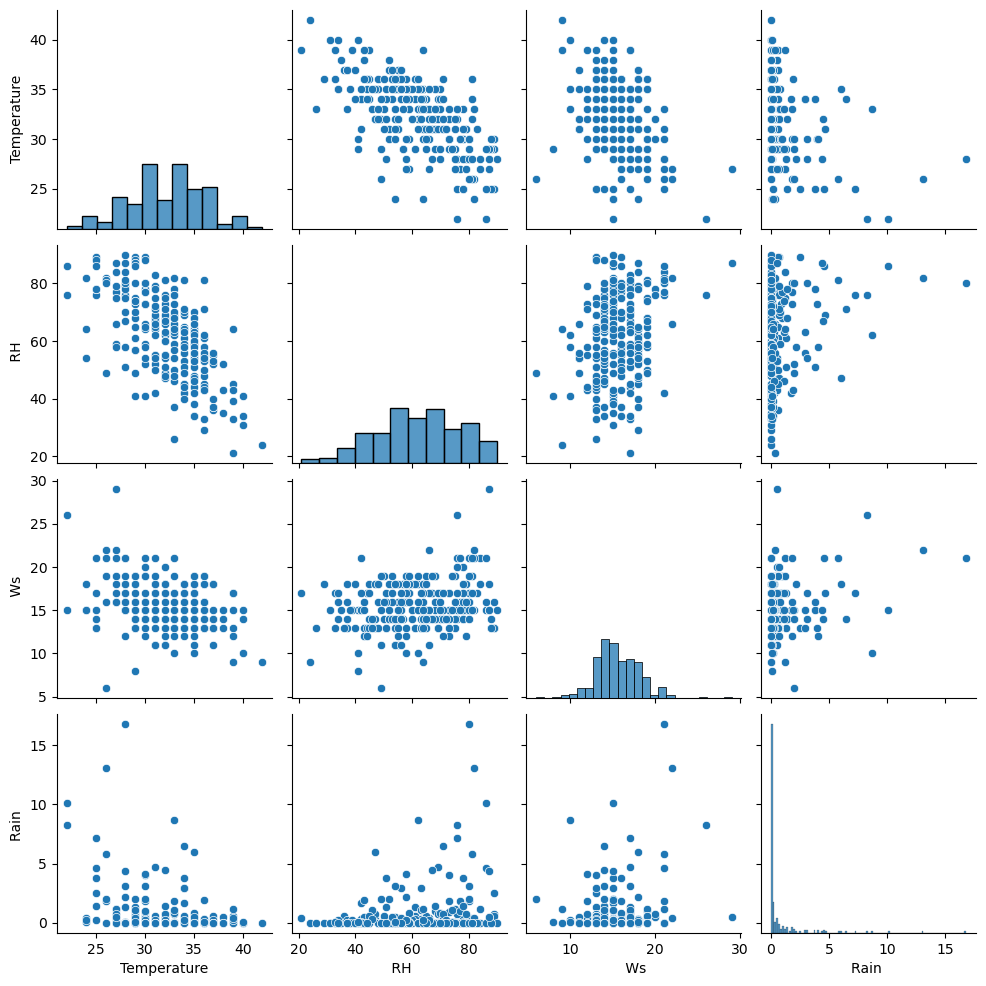

In [29]:
sns.pairplot(weather_df)

In [30]:
weather_df.corr()

,Temperature,RH,Ws,Rain
Temperature,1.000000,-0.654443,-0.278132,-0.326786
RH,-0.654443,1.000000,0.236084,0.222968
Ws,-0.278132,0.236084,1.000000,0.170169
Rain,-0.326786,0.222968,0.170169,1.000000


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:111

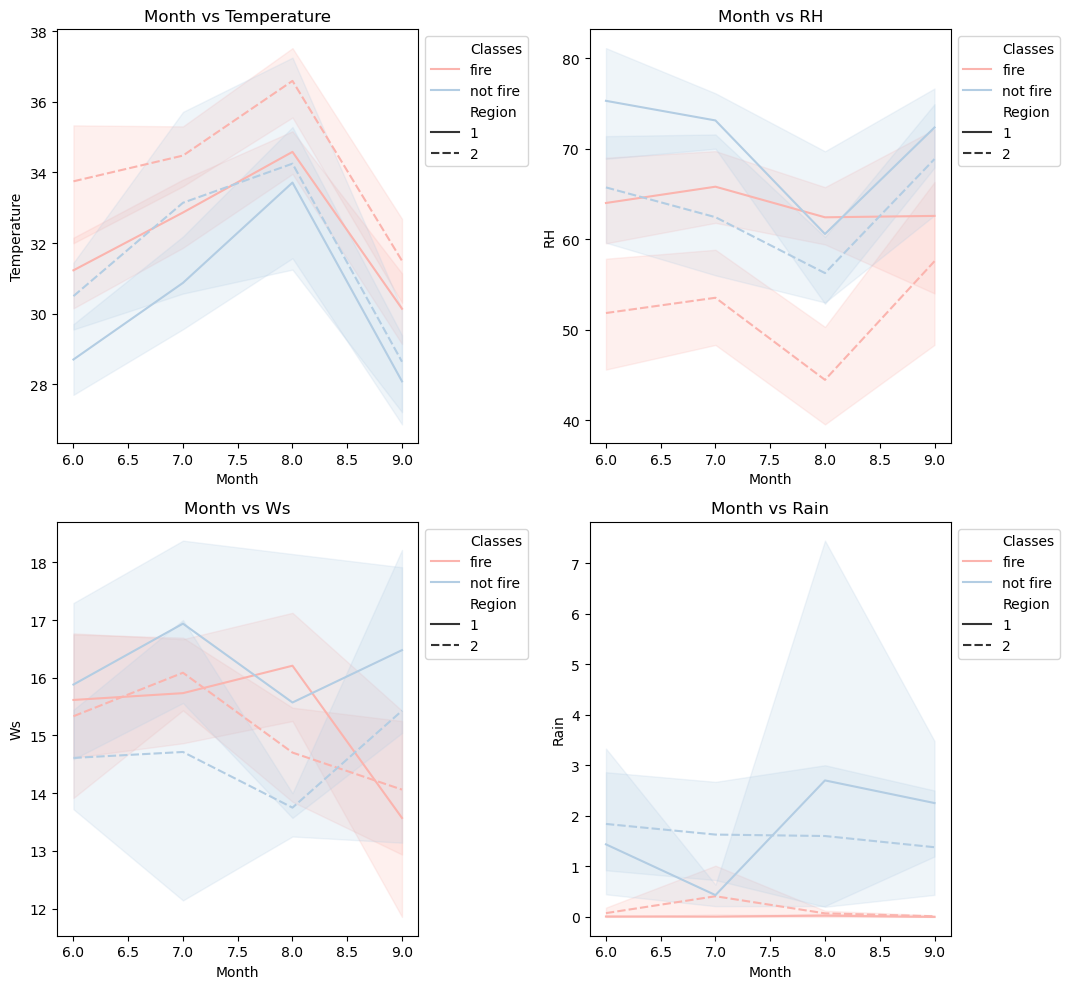

In [31]:
sns.set_palette("Pastel1")
Algeria_data.columns = Algeria_data.columns.str.strip()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
si1 = [[0, 0], [0, 1], [1, 0], [1, 1]]

for item in range(len(weather_columns)):
    i, j = si1[item]
    ax = axes[i, j]
    sns.lineplot(
        data=Algeria_data,
        x='month',
        y=weather_columns[item].strip(), 
        hue='Classes',
        style='Region',
        ax=ax
    )
    ax.set_title(f'Month vs {weather_columns[item].strip()}', fontsize=12)  
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel(weather_columns[item].strip(), fontsize=10)  
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()



In [32]:
# fire weather indices
fwi_columns = features[7:-2]
fwi_columns

['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [33]:
fwi_df = pd.DataFrame()
fwi_df=df_Algeria[fwi_columns]
fwi_df.head()

,FFMC,DMC,DC,ISI,BUI,FWI
0,65.7,3.4,7.6,1.3,3.4,0.5
1,64.4,4.1,7.6,1.0,3.9,0.4
2,47.1,2.5,7.1,0.3,2.7,0.1
3,28.6,1.3,6.9,0.0,1.7,0.0
4,64.8,3.0,14.2,1.2,3.9,0.5


In [34]:
fwi_df.corr()

,FFMC,DMC,DC,ISI,BUI,FWI
FFMC,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

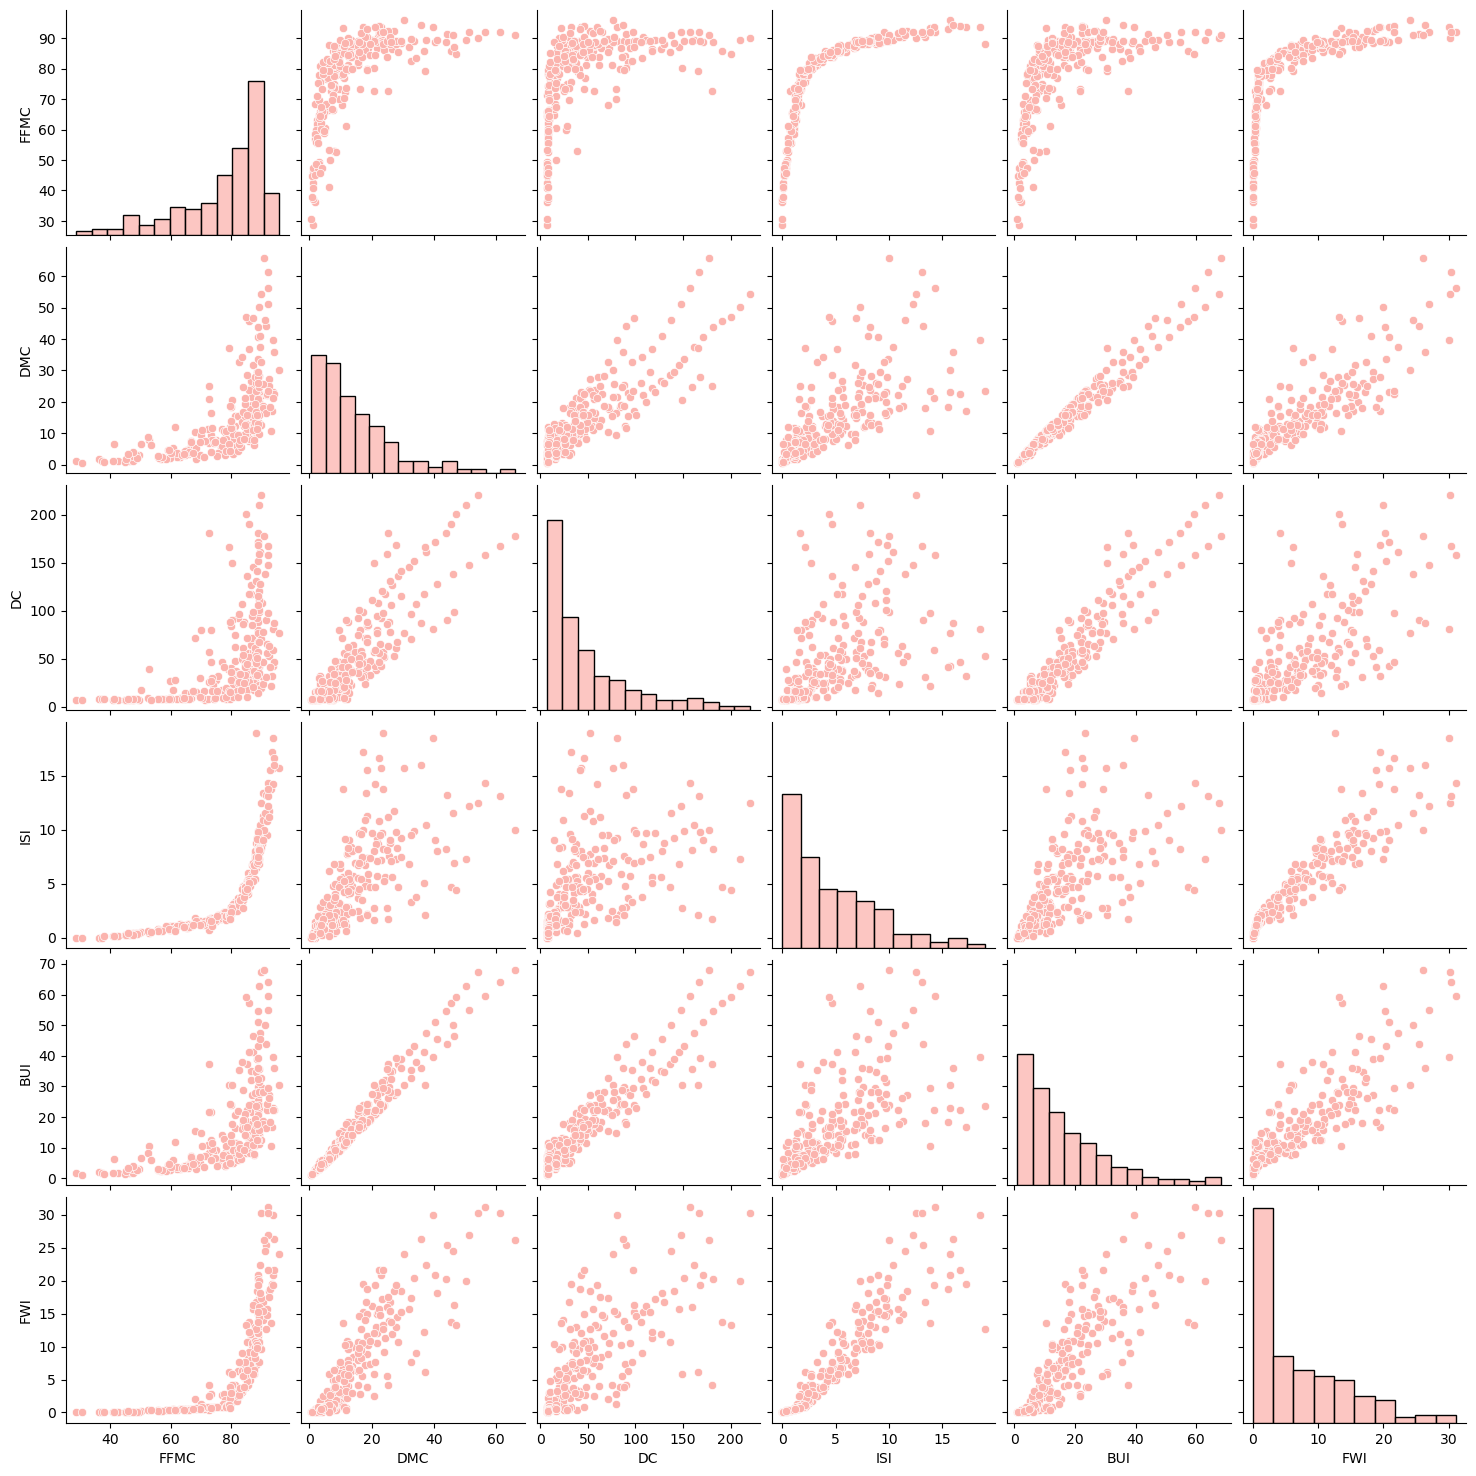

In [35]:
sns.pairplot(fwi_df)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:111

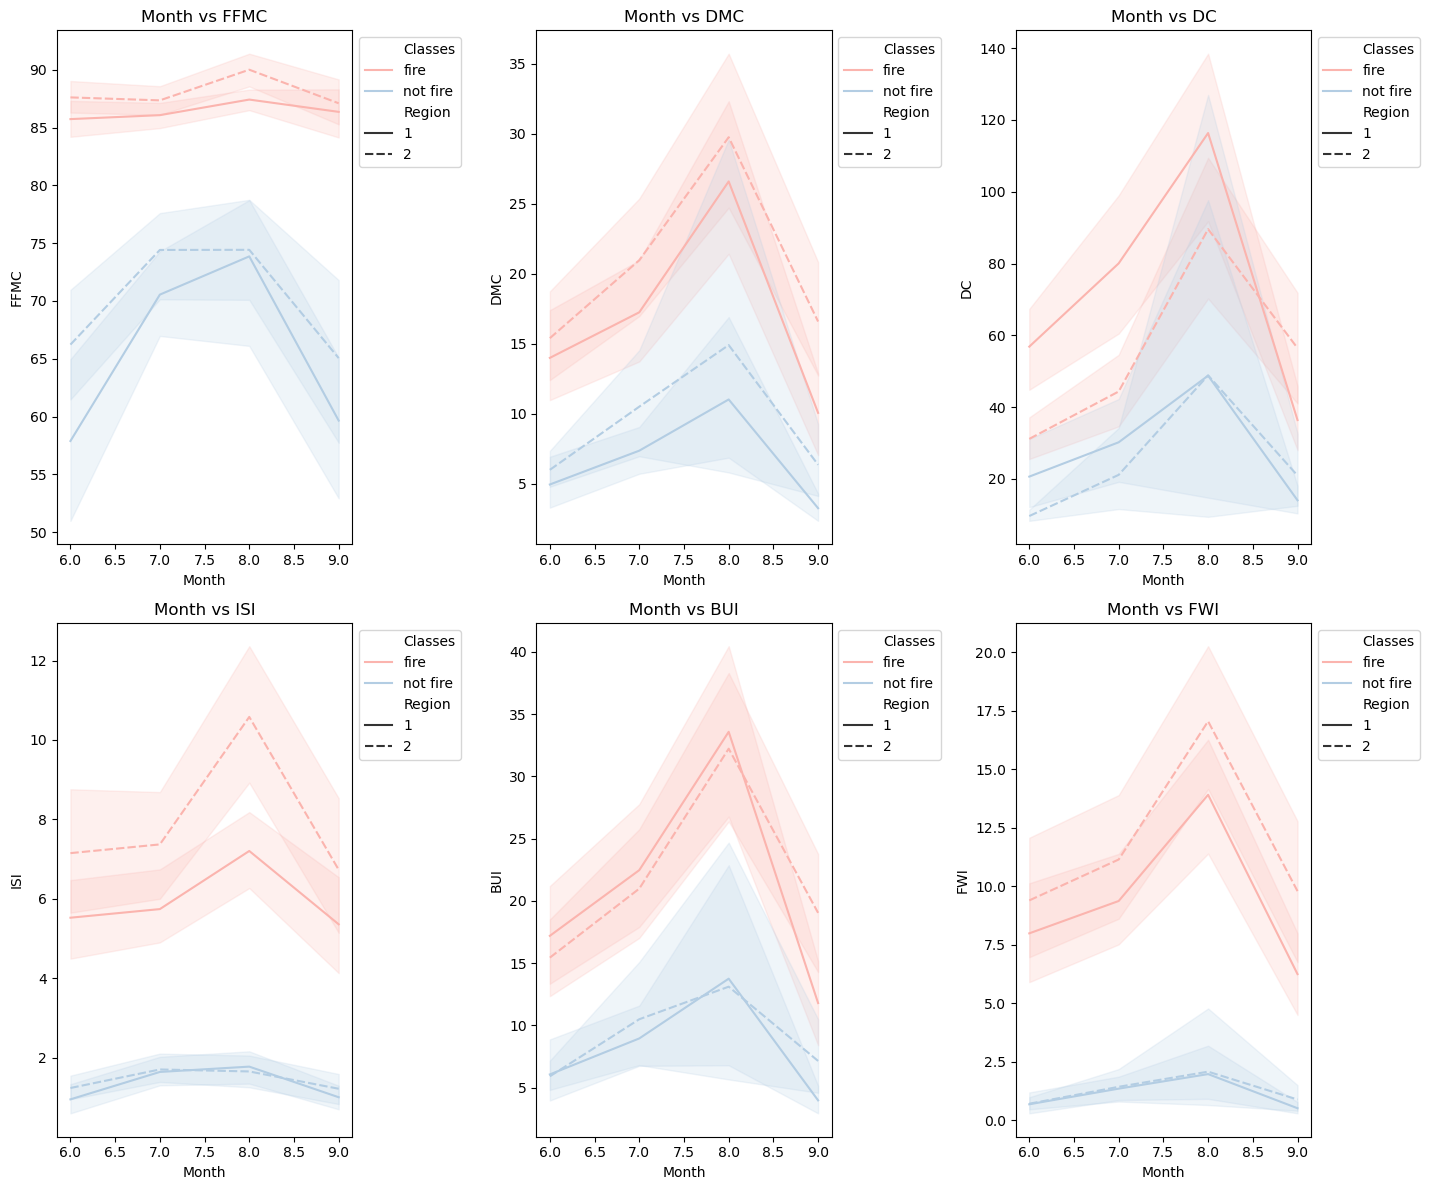

In [36]:
sns.set_palette("Pastel1")
Algeria_data.columns = Algeria_data.columns.str.strip()
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
si1 = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]

for item in range(len(fwi_columns)):
    i, j = si1[item]
    ax = axes[i, j]
    sns.lineplot(
        data=Algeria_data,
        x='month',
        y=fwi_columns[item].strip(),  # Remove extra spaces from column name
        hue='Classes',
        style='Region',
        ax=ax
    )
    ax.set_title(f'Month vs {fwi_columns[item].strip()}', fontsize=12)  # Strip spaces in title
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel(fwi_columns[item].strip(), fontsize=10)  # Strip spaces in label
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to accommodate legends
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

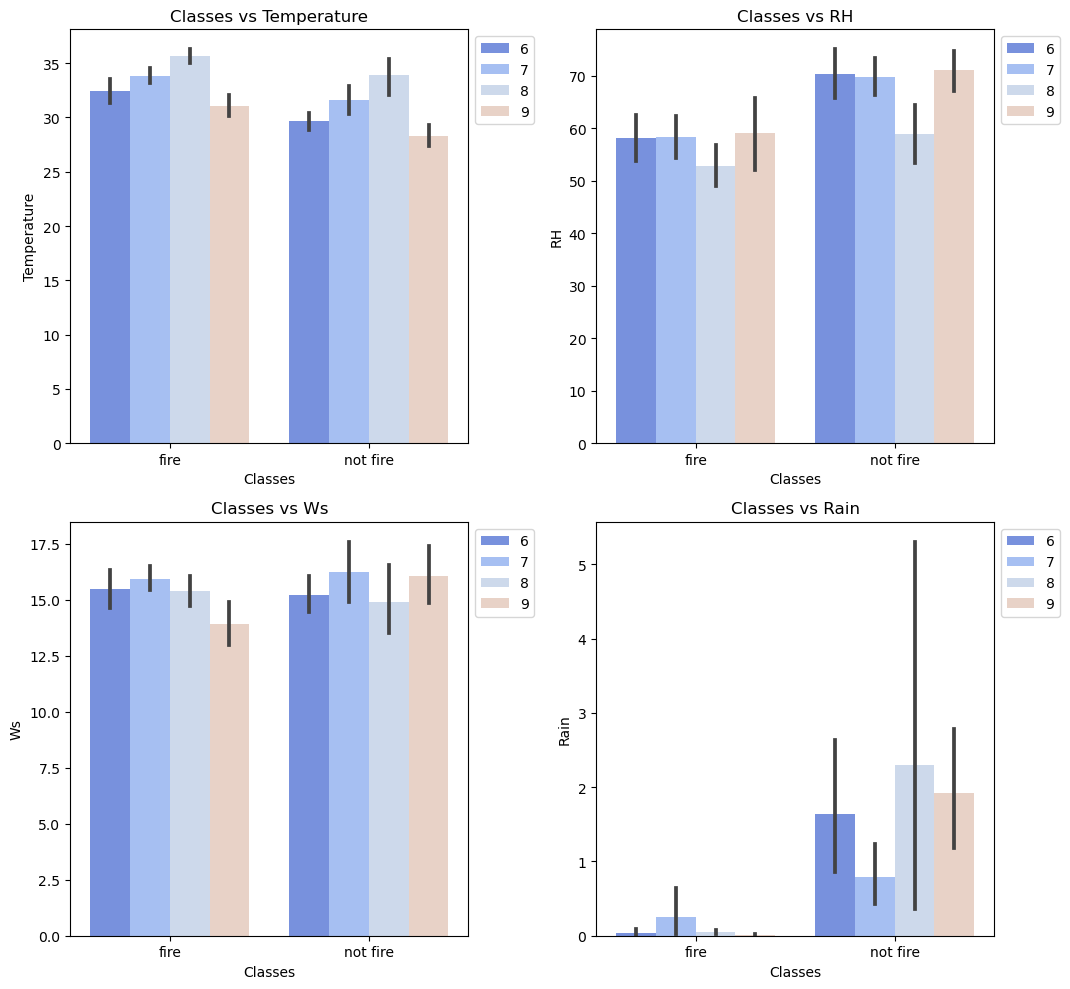

In [37]:
sns.set_palette("coolwarm")
Algeria_data.columns = Algeria_data.columns.str.strip()
Algeria_data['month'] = Algeria_data['month'].astype(str)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
si1 = [[0, 0], [0, 1], [1, 0], [1, 1]]

for item in range(len(weather_columns)):
    i, j = si1[item]
    ax = axes[i, j]
    sns.barplot(
        data=Algeria_data,
        x='Classes',
        y=weather_columns[item].strip(),  
        hue='month',
        ax=ax
    )
    ax.set_title(f'Classes vs {weather_columns[item].strip()}', fontsize=12) 
    ax.set_xlabel('Classes', fontsize=10)
    ax.set_ylabel(weather_columns[item].strip(), fontsize=10)  
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

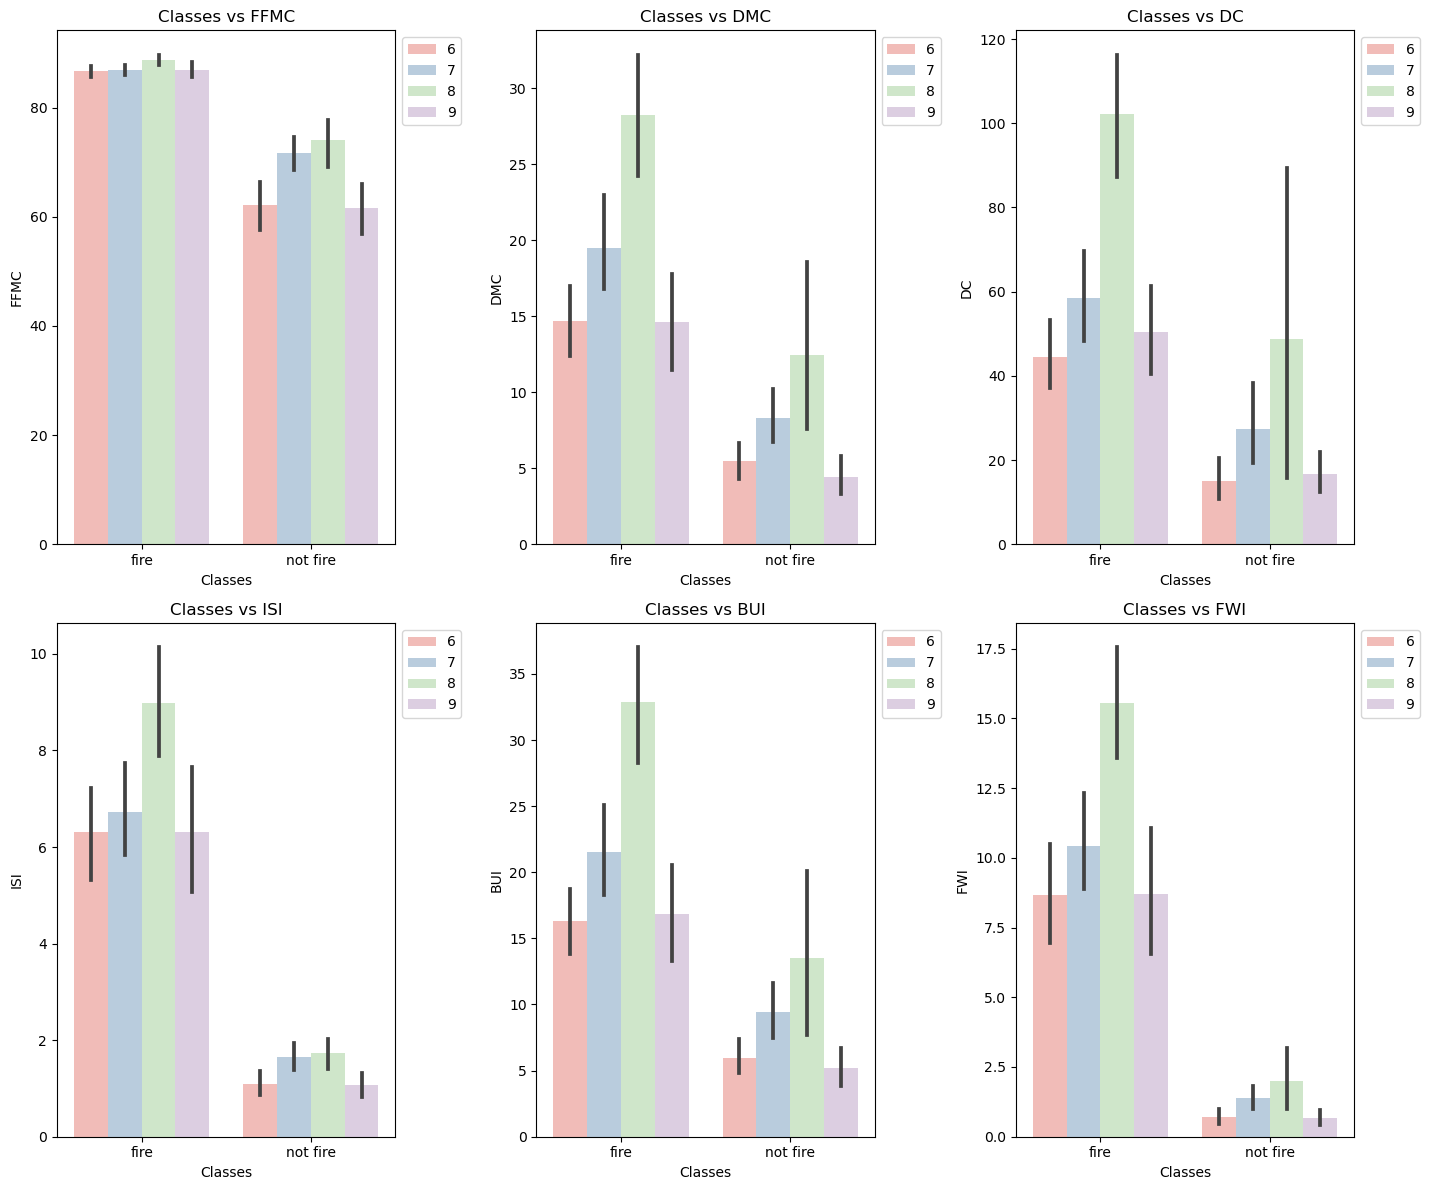

In [38]:
sns.set_palette("Pastel1")
Algeria_data.columns = Algeria_data.columns.str.strip()
Algeria_data['month'] = Algeria_data['month'].astype(str)
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
si1 = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]

for item in range(len(fwi_columns)):
    i, j = si1[item]
    ax = axes[i, j]
    sns.barplot(
        data=Algeria_data,
        x='Classes',
        y=fwi_columns[item].strip(), 
        hue='month',
        ax=ax
    )
    ax.set_title(f'Classes vs {fwi_columns[item].strip()}', fontsize=12) 
    ax.set_xlabel('Classes', fontsize=10)
    ax.set_ylabel(fwi_columns[item].strip(), fontsize=10)  
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



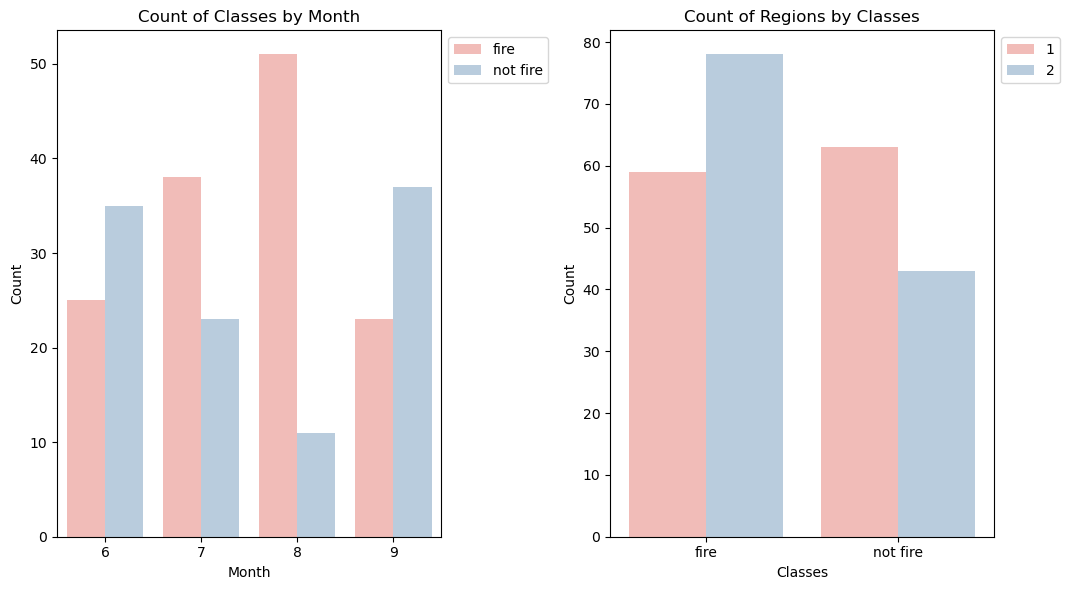

In [39]:


sns.set_palette("Pastel1")

Algeria_data.columns = Algeria_data.columns.str.strip()
Algeria_data['month'] = Algeria_data['month'].astype(str)
Algeria_data['Region'] = Algeria_data['Region'].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='month', hue='Classes', data=Algeria_data, ax=axes[0])
sns.countplot(x='Classes', hue='Region', data=Algeria_data, ax=axes[1])

axes[0].set_title('Count of Classes by Month', fontsize=12)
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1)) 

axes[1].set_title('Count of Regions by Classes', fontsize=12)
axes[1].set_xlabel('Classes', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()